Вы уже немного поработали с датасетом wine, давайте теперь расширим наш анализ. Ваша задача:



Изучить влияние масштабирования признаков на производительность модели логистической регрессии.



Оценить важность признаков для классификации с помощью коэффициентов модели.



Визуализировать результаты для лучшего понимания данных и работы модели.



Масштабирование признаков: Примените MinMaxScaler для масштабирования признаков. Обучите модель логистической регрессии на масштабированных данных и сравните точность с моделью, обученной на не масштабированных данных.



Визуализация важности признаков: Используя обученную модель на масштабированных данных, извлеките коэффициенты модели (model.coef_) и визуализируйте важность признаков. Создайте график, где каждый признак будет представлен столбцом, высота которого соответствует его коэффициенту в модели. Это поможет понять, какие химические характеристики вина вносят наибольший вклад в его классификацию.



Визуализация распределений признаков по классам: Выберите два признака с наибольшими абсолютными коэффициентами. С помощью seaborn создайте графики распределения этих признаков для разных классов вина. Это может быть график типа sns.boxplot или sns.violinplot, который покажет, как распределение каждого из выбранных признаков отличается в зависимости от класса вина.

In [74]:
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = load_wine()

print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [75]:
features = data['data']
cols = data['feature_names']
target = data['target']
target_name = data['target_names']

dataset = pd.DataFrame(data=features, columns= cols)
dataset['target'] = target
target_dict = {i: target_name[i] for i in range(len(target_name))}
dataset['target_name'] = dataset['target'].map(target_dict)

dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,class_2


In [76]:
X = dataset.drop(columns = ['target', 'target_name'])
y = dataset[['target', 'target_name']].copy()
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [77]:
y.value_counts(normalize=True)

target  target_name
1       class_1        0.398876
0       class_0        0.331461
2       class_2        0.269663
Name: proportion, dtype: float64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

y_train.value_counts(normalize=True)

target  target_name
1       class_1        0.435484
0       class_0        0.322581
2       class_2        0.241935
Name: proportion, dtype: float64

In [79]:
X_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,12.962500,2.332339,2.371774,19.752419,99.387097,2.335726,2.078468,0.362903,1.657016,4.980484,0.971903,2.608306,753.709677
std,0.829151,1.127810,0.299208,3.513770,14.348003,0.620695,0.996348,0.127909,0.560625,2.358113,0.234532,0.687734,328.098111
min,11.030000,0.890000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.550000,1.270000,278.000000
25%,12.337500,1.610000,2.210000,17.350000,88.000000,1.822500,1.250000,0.260000,1.350000,3.050000,0.787500,1.997500,501.500000
50%,13.040000,1.830000,2.360000,19.500000,98.000000,2.355000,2.170000,0.340000,1.625000,4.600000,0.980000,2.820000,675.000000
75%,13.592500,3.187500,2.600000,21.700000,107.000000,2.835000,2.895000,0.450000,1.972500,6.200000,1.130000,3.120000,985.000000
max,14.830000,5.800000,3.230000,30.000000,151.000000,3.850000,5.080000,0.660000,3.580000,13.000000,1.710000,3.920000,1680.000000


In [80]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_t_scaled = scaler.transform(X_test)

In [81]:
X_tr_scaled = pd.DataFrame(data=X_tr_scaled, columns=X_train.columns)
X_t_scaled = pd.DataFrame(data=X_t_scaled, columns=X_test.columns)

In [82]:
X_tr_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,0.508553,0.293755,0.541056,0.471774,0.362804,0.472378,0.366765,0.439440,0.391461,0.315741,0.363710,0.505021,0.339308
std,0.218198,0.229696,0.160004,0.181122,0.177136,0.216270,0.210200,0.241337,0.177413,0.201204,0.202183,0.259522,0.234021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.344079,0.146640,0.454545,0.347938,0.222222,0.293554,0.191983,0.245283,0.294304,0.151024,0.204741,0.274528,0.159415
50%,0.528947,0.191446,0.534759,0.458763,0.345679,0.479094,0.386076,0.396226,0.381329,0.283276,0.370690,0.584906,0.283167
75%,0.674342,0.467923,0.663102,0.572165,0.456790,0.646341,0.539030,0.603774,0.491297,0.419795,0.500000,0.698113,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
model = LogReg(max_iter = 10000)
model.fit(X_train,y_train['target'])
prediction = model.predict(X_test)
accuracy = accuracy_score(y_test['target'],prediction) 

model_sc = LogReg()
model_sc.fit(X_tr_scaled, y_train['target'])
prediction_sc = model.predict(X_t_scaled)
accuracy_sc = accuracy_score(y_test['target'],prediction_sc)

print(classification_report(y_test['target'], prediction))
print(confusion_matrix(y_test['target'], prediction))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        18

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[19  0  0]
 [ 1 16  0]
 [ 0  0 18]]


In [99]:
model.coef_, model.intercept_

(array([[ 7.40556732e-01,  5.00384353e-01,  6.64831861e-01,
         -2.77988216e-01,  2.14499607e-03,  2.23627951e-01,
          6.81362679e-01,  1.11808758e-01,  3.65544160e-02,
          1.16404372e-01,  9.08842667e-03,  5.54796674e-01,
          8.72870802e-03],
        [-8.35401831e-01, -6.96667132e-01, -7.97074637e-01,
          1.63360714e-01, -2.39879493e-02,  1.59432844e-02,
          4.06836411e-01, -3.98354053e-02,  4.36611002e-01,
         -8.38921344e-01,  2.99543149e-01,  1.72616228e-01,
         -8.78959990e-03],
        [ 9.48450984e-02,  1.96282779e-01,  1.32242776e-01,
          1.14627502e-01,  2.18429532e-02, -2.39571236e-01,
         -1.08819909e+00, -7.19733523e-02, -4.73165418e-01,
          7.22516972e-01, -3.08631575e-01, -7.27412902e-01,
          6.08918843e-05]]),
 array([-17.28817094,  22.00772453,  -4.71955359]))

In [100]:
model_sc.feature_names_in_

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

In [101]:
coef_dict = {model.feature_names_in_[i]:model.coef_[0][i] for i in range(len(model.feature_names_in_))}
coef_dict = dict(sorted(coef_dict.items(), key=lambda x:x[1], reverse=True))
coef_dict

{'alcohol': 0.7405567324129273,
 'flavanoids': 0.6813626793484697,
 'ash': 0.6648318606114807,
 'od280/od315_of_diluted_wines': 0.5547966742427752,
 'malic_acid': 0.5003843532646671,
 'total_phenols': 0.2236279513389105,
 'color_intensity': 0.1164043721971522,
 'nonflavanoid_phenols': 0.1118087576071118,
 'proanthocyanins': 0.036554415951876355,
 'hue': 0.009088426672110921,
 'proline': 0.008728708018858906,
 'magnesium': 0.0021449960692636653,
 'alcalinity_of_ash': -0.27798821623889136}

In [102]:
print(f"Accuracy without scaling:{accuracy}")
print(f"Accuracy with scaling:{accuracy_sc}")

Accuracy without scaling:0.9814814814814815
Accuracy with scaling:0.3148148148148148


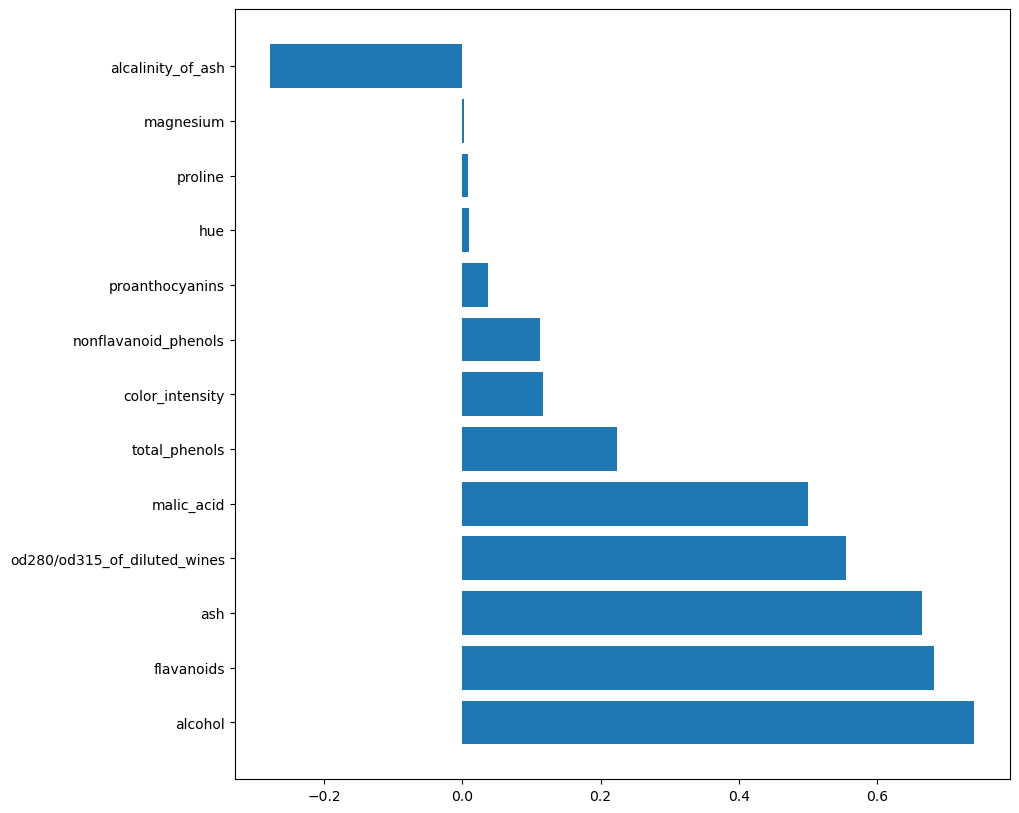

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
plt.barh(range(len(coef_dict)), coef_dict.values())
plt.yticks(range(len(coef_dict)), coef_dict.keys())
plt.show()

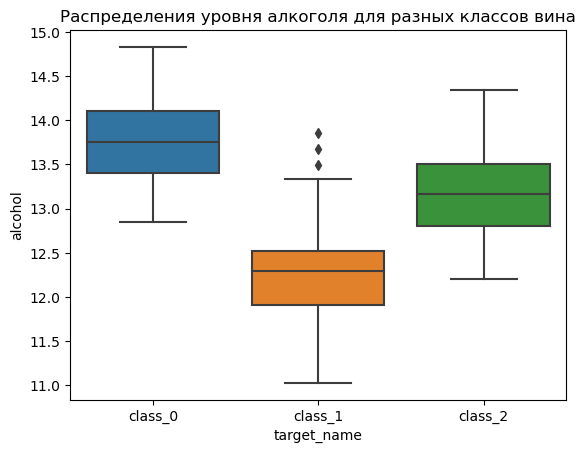

In [104]:
sns.boxplot(data=dataset, y=dataset['alcohol'], x=dataset['target_name'])
plt.title('Распределения уровня алкоголя для разных классов вина')
plt.show()

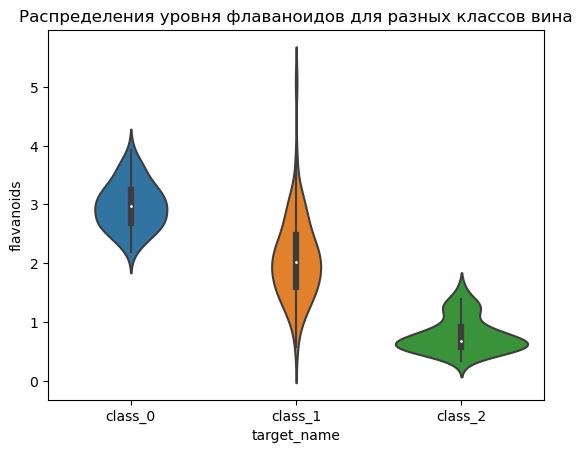

In [105]:
sns.violinplot(data=dataset, y=dataset['flavanoids'], x=dataset['target_name'])
plt.title('Распределения уровня флаваноидов для разных классов вина')
plt.show()